In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy import stats
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist]
plt.rc('font', family ='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
# from statannot import add_stat_annotation
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
#파일을 불러옵니다.
p = pd.read_excel("../user/(반출금지) 미니프로젝트-쇼핑몰 실습데이터.xlsx")

In [3]:
p

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN


## p 파일 데이터 확인 및 분석

In [4]:
# 주문수량 nan값 확인
p['주문수량'].isna().sum()

0

In [5]:
p['판매금액'].isna().sum()

0

In [6]:
p['결제방법'].isna().sum()

14

In [7]:
p['할부기간'].notna().sum()

1927

In [8]:
p['처리상태'].isna().sum()

0

# 1번 RFM분석

### 1:RFM분석을 위한 3개의 그룹 설정

#### 최근 날짜에 따라 등급 설정

In [9]:
NOW = dt.datetime(2022, 12, 1)

# 각 주문의 recency 계산 (현재 날짜 - 주문일자)
p['recency_days'] = (NOW - p['주문일자']).dt.days

# recency 등급을 매기는 함수 정의
def categorize_recency(days):
    if days <= 365:
        return 3
    elif days <= 730:
        return 2
    else:
        return 1
        
# 각 주문에 대해 recency 등급 적용
p['recency'] = p['recency_days'].apply(categorize_recency)

# 필요에 따라 'recency_days' 컬럼 삭제
p.drop(columns=['recency_days'], inplace=True)

# 결과 확인
p

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,1
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,1
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,1
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,1
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,3
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,3
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,3
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN,3


#### 빈도수에 따라 그룹 등급 설정

In [10]:
# RFM 데이터 계산
rfmTable_f = p.groupby('업체명').agg({ 
    '업체명': lambda x: len(x),  # Frequency
})

# 열 이름 변경
rfmTable_f.rename(columns={'업체명': 'frequency'}, inplace=True)

# Frequency 기준으로 그룹화
freq_bins = [0, 1000, 10000, np.inf]
freq_labels = ['1', '2', '3']

# pd.cut 함수를 사용하여 각 업체를 Frequency 범위에 따라 분류합니다.
rfmTable_f['frequency_group'] = pd.cut(rfmTable_f['frequency'], bins=freq_bins, labels=freq_labels, right=False)

# Frequency 그룹화 결과 출력
print("Frequency Group:")
print(rfmTable_f[['frequency', 'frequency_group']].sort_values(by='frequency_group'))

# 각 등급별 업체 리스트 출력
for group in freq_labels:
    print(f"\nFrequency Group {group} 등급:")
    print(rfmTable_f[rfmTable_f['frequency_group'] == group])

# Frequency가 가장 높은 데이터와 가장 낮은 데이터 2개씩 출력
highest_freq = rfmTable_f.sort_values(by='frequency', ascending=False).head(2)
lowest_freq = rfmTable_f.sort_values(by='frequency', ascending=True).head(2)

print("\nFrequency가 가장 높은 데이터 2개:")
print(highest_freq)

print("\nFrequency가 가장 낮은 데이터 2개:")
print(lowest_freq)

# 원래 데이터프레임 p에 frequency_group 열 추가
p = pd.merge(p, rfmTable_f[['frequency_group']], on='업체명', how='left')
p.rename(columns={'frequency_group': 'frequency'}, inplace=True)

Frequency Group:
         frequency frequency_group
업체명                               
7321디자인         77               1
이선생자석교구          8               1
이루커머스            6               1
이든교육           229               1
유쾌한생각           67               1
...            ...             ...
라온웍스          3934               2
알파            3688               2
지니           61835               3
다우기술         85553               3
쥬크박스         18661               3

[89 rows x 2 columns]

Frequency Group 1 등급:
         frequency frequency_group
업체명                               
7321디자인         77               1
가베             348               1
가이스파트너스        306               1
그린피앤에스         278               1
네오필립            89               1
...            ...             ...
피플이엔티           70               1
한민유통           663               1
한샘글로벌            3               1
행복한바오밥         237               1
헬스하우스           15               1

[74 rows x 2 columns]

Fre

In [11]:
# frequency_group의 각 등급별 개수 확인
frequency_group_counts = rfmTable_f['frequency_group'].value_counts().sort_index()
print("Frequency Group Counts:")
print(frequency_group_counts)

Frequency Group Counts:
frequency_group
1    74
2    12
3     3
Name: count, dtype: int64


In [12]:
p

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency,frequency
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,1,3
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,1,3
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,1,3
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,1,3
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,3,2
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,3,2
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,3,2
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN,3,3


#### 지출액에 따라 그룹 등급 설정

In [13]:
# 판매금액 합계 계산
df_sum = p.groupby('업체명')['판매금액'].sum().reset_index()

# 매출액 기준으로 그룹 지정
# bins는 매출액 범위를 정의합니다: [0, 10,000,000, 100,000,000 무한대]
bins = [0, 10000000, 100000000, np.inf]
# labels는 각 범위에 대한 이름을 지정합니다.
labels = ['1', '2', '3']

# pd.cut 함수를 사용하여 각 업체를 매출액 범위에 따라 분류합니다.
df_sum['monetary'] = pd.cut(df_sum['판매금액'], bins=bins, labels=labels, right=False)

# 결과 출력
# 억 단위 그룹
billion_group = df_sum[df_sum['monetary'] == '3']
print("억 단위 그룹:")
print(billion_group)

# 천만 단위 그룹
ten_million_group = df_sum[df_sum['monetary'] == '2']
print("\n천만 단위 그룹:")
print(ten_million_group)

# 그 이하 그룹
below_group = df_sum[df_sum['monetary'] == '1']
print("\n그 이하 그룹:")
print(below_group)

억 단위 그룹:
             업체명        판매금액 monetary
7           다우기술  3687810416        3
12          라온웍스   215238580        3
49         에이스디포   316171800        3
52          오피스퀵   218748500        3
67          쥬크박스   110472470        3
68            지니  1241881825        3
69        지니 태블릿  1455928000        3
70  지니 태블릿(후불집행)  1081872000        3
72         천재태블릿  2362932000        3

천만 단위 그룹:
            업체명      판매금액 monetary
2       가이스파트너스  18177500        2
3        거영아이앤디  36582310        2
5          네오필립  11158200        2
6          뉴트리원  13811400        2
8         더싸다닷컴  53118000        2
9           드림빌  35672790        2
18   리얼리티리테일코리아  11711100        2
20        리틀램스쿨  10405880        2
31    블루스톤익스체인지  90914460        2
32       비전플레이스  16460000        2
33       비즈마켓렌탈  24392730        2
34          빅픽처  45763100        2
38        셀러테스트  21422300        2
40         스테툴스  11344080        2
41      싱크로드코리아  17235800        2
42       아이엔리테일  28435000        2
43   

In [14]:
## 그룹변수 추가
p = pd.merge(p, df_sum[['업체명', 'monetary']], on='업체명', how='left')

In [15]:
p

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency,frequency,monetary
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13 17:03:37,구매확정,N,NaN,NaN,1,3,3
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,1,3,3
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16 10:04:50,구매확정,N,NaN,NaN,1,3,3
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,1,3,3
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16 17:33:43,구매확정,N,NaN,NaN,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,3,2,3
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08 10:38:21,결제완료,Y,NaN,NaN,3,2,3
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08 10:43:15,배송준비,N,NaN,NaN,3,2,3
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08 10:45:14,배송완료,N,NaN,NaN,3,3,3


### 카이제곱을 이용한 RFM 요소간 상관분석

In [16]:
## H0: 두 변수간 관련이 없다.
## H1: 두 변수간 관련이 있다.
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(p['recency'], p['frequency']))
print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)

## p-value의 값이 0.05보다 작으므로 귀무가설을 기각한다. 따라서 두 변수간의 관련이 있다.
## 카이제곱 통계량: 6646.998535445041
# p-value: 0.0



카이제곱 통계량: 6646.998535445041
p-value: 0.0


In [17]:
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(p['recency'], p['monetary']))
print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)
## p-value의 값이 0.05보다 작으므로 귀무가설을 기각한다. 따라서 두 변수간의 관련이 있다.
## 카이제곱 통계량: 4512.236474974696
## p-value: 0.0

카이제곱 통계량: 4512.236474974696
p-value: 0.0


In [18]:
chi2_stat, p_val, dof, expected = chi2_contingency(pd.crosstab(p['frequency'], p['monetary']))
print("카이제곱 통계량:", chi2_stat)
print("p-value:", p_val)
## p-value의 값이 0.05보다 작으므로 귀무가설을 기각한다. 따라서 두 변수간의 관련이 있다.
## 카이제곱 통계량: 177125.0592794641
## p-value: 0.0

카이제곱 통계량: 177125.0592794641
p-value: 0.0


In [19]:
# 억 단위 그룹 업체명 리스트 추출
billion_group_shop_names = billion_group['업체명'].tolist()

# 원본 데이터에서 억 단위 그룹 데이터만 필터링
billion_group_shop_data = p[p['업체명'].isin(billion_group_shop_names)]

# 현재 날짜 설정
NOW = dt.datetime(2022, 12, 1)

# RFM 데이터 계산
rfmTable = billion_group_shop_data.groupby('업체명').agg({
    '주문일자': lambda x: (NOW - x.max()).days, # Recency: '주문일자'가 최근 구매일을 나타내는 열이라고 가정
    '업체명': lambda x: len(x),                   # Frequency
    '판매금액': lambda x: x.sum()                  # Monetary Value
})

# 열 이름 변경
rfmTable.rename(columns={'주문일자': 'recency',
                         '업체명': 'frequency',
                         '판매금액': 'monetary_value'}, inplace=True)

In [20]:
rfmTable

,recency,frequency,monetary_value
업체명,,,
다우기술,22,85553,3687810416
라온웍스,23,3934,215238580
에이스디포,22,8388,316171800
오피스퀵,23,7173,218748500
쥬크박스,22,18661,110472470
지니,22,61835,1241881825
지니 태블릿,306,1506,1455928000
지니 태블릿(후불집행),183,1297,1081872000
천재태블릿,22,2891,2362932000


In [21]:
# rfmTable에서 랜덤하게 3개의 행을 샘플링
random_sample = rfmTable.sample(n=3)

print(random_sample)

       recency  frequency  monetary_value
업체명                                      
천재태블릿       22       2891      2362932000
오피스퀵        23       7173       218748500
에이스디포       22       8388       316171800


In [22]:
# 다우기술 데이터
dawoo_data = p[p['업체명'] == '다우기술'].tail(1).copy()

# 쥬크박스 데이터
jukebox_data = p[p['업체명'] == '쥬크박스'].tail(1).copy()

# 지니 데이터
genie_data = p[p['업체명'] == '지니'].tail(1).copy()

# 세 개의 데이터프레임을 하나로 합치기
combined_data = pd.concat([dawoo_data, jukebox_data, genie_data])

print(combined_data)

                   주문번호   업체명                                  상품명   제조사  \
218600  221108105148171  다우기술  [특별한 크리스마스] 2차-신세계 상품권 모바일 교환권-1만원권   신세계   
218585  221108100059449  쥬크박스             [학생선물] 크리스마스 무릎담요 (랜덤발송)   NaN   
218578  221108100059449    지니        [한정판매] 셀파우등생-흔들이 핫팩 1Box 80개입  동성산업   

        주문수량    판매금액  결제방법                주문일자  처리상태 초도상품 제작문구 내역 할부기간  \
218600    17  161500  신용카드 2022-11-08 10:49:28  배송완료    N     NaN  NaN   
218585     2   14300  신용카드 2022-11-08 09:58:38  결제완료    N     NaN  NaN   
218578     1   29900  신용카드 2022-11-08 09:58:38  결제완료    N     NaN  NaN   

        recency frequency monetary  
218600        3         3        3  
218585        3         3        3  
218578        3         3        3  


In [23]:
# 천만 단위 그룹 업체명 리스트 추출
ten_million_group_shop_names = ten_million_group['업체명'].tolist()

# 원본 데이터에서 억 단위 그룹 데이터만 필터링
ten_million_group_shop_data = p[p['업체명'].isin(ten_million_group_shop_names)]

# 현재 날짜 설정
NOW = dt.datetime(2022, 12, 1)

# RFM 데이터 계산
rfmTable2 = ten_million_group_shop_data.groupby('업체명').agg({
    '주문일자': lambda x: (NOW - x.max()).days, # Recency: '주문일자'가 최근 구매일을 나타내는 열이라고 가정
    '업체명': lambda x: len(x),                   # Frequency
    '판매금액': lambda x: x.sum()                  # Monetary Value
})

# 열 이름 변경
rfmTable2.rename(columns={'주문일자': 'recency',
                         '업체명': 'frequency',
                         '판매금액': 'monetary_value'}, inplace=True)

In [24]:
rfmTable2

,recency,frequency,monetary_value
업체명,,,
가이스파트너스,321,306,18177500
거영아이앤디,23,4384,36582310
네오필립,492,89,11158200
뉴트리원,329,337,13811400
더싸다닷컴,50,172,53118000
드림빌,48,351,35672790
리얼리티리테일코리아,30,99,11711100
리틀램스쿨,27,495,10405880
블루스톤익스체인지,29,1871,90914460


In [25]:
# rfmTable에서 랜덤하게 3개의 행을 샘플링
random_sample = rfmTable2.sample(n=3)

print(random_sample)

        recency  frequency  monetary_value
업체명                                       
거영아이앤디       23       4384        36582310
청화           28        280        14975200
비즈마켓렌탈      161         27        24392730


In [26]:
# 거영아이앤디 데이터
ind_data = p[p['업체명'] == '거영아이앤디'].tail(1).copy()

# 네오필립 데이터
neo_data = p[p['업체명'] == '네오필립'].tail(1).copy()

# 애플나라샵 데이터
apple_data = p[p['업체명'] == '애플나라샵'].tail(1).copy()


# 세 개의 데이터프레임을 하나로 합치기
combined_data2 = pd.concat([ind_data, neo_data, apple_data])

print(combined_data2)

                   주문번호     업체명  \
218494  221107225547411  거영아이앤디   
76860   210726210951564    네오필립   
218369  221107193420809   애플나라샵   

                                                  상품명   제조사  주문수량    판매금액  \
218494                   [학생선물] 500 해피프랜즈 랜덤 지우개-10개입   NaN     1    2650   
76860                   [LG전자] 싸이킹 진공청소기 C40KFHT.AKOR  LG전자     1  157000   
218369  [UPGRADE 특가] 갤럭시탭 S6 라이트 하이브리드 스마트 케이스 (색상선택)   GSB     1   14400   

         결제방법                주문일자  처리상태 초도상품 제작문구 내역 할부기간  recency frequency  \
218494  신 + 포 2022-11-07 22:53:27   배송중    N     NaN  NaN        3         2   
76860    신용카드 2021-07-26 21:08:27  주문취소    N     NaN  NaN        2         1   
218369  신 + 포 2022-11-07 19:31:59  결제완료    N     NaN  NaN        3         1   

       monetary  
218494        2  
76860         2  
218369        2  


In [27]:
# 천만이하 단위 그룹 업체명 리스트 추출
below_group_shop_names =below_group['업체명'].tolist()

# 원본 데이터에서 억 단위 그룹 데이터만 필터링
below_group_shop_data = p[p['업체명'].isin(below_group_shop_names)]

# 현재 날짜 설정
NOW = dt.datetime(2022, 12, 1)

# RFM 데이터 계산
rfmTable3 = below_group_shop_data.groupby('업체명').agg({
    '주문일자': lambda x: (NOW - x.max()).days, # Recency: '주문일자'가 최근 구매일을 나타내는 열이라고 가정
    '업체명': lambda x: len(x),                   # Frequency
    '판매금액': lambda x: x.sum()                  # Monetary Value
})
# 열 이름 변경
rfmTable3.rename(columns={'주문일자': 'recency',
                         '업체명': 'frequency',
                         '판매금액': 'monetary_value'}, inplace=True)

In [28]:
rfmTable3

,recency,frequency,monetary_value
업체명,,,
7321디자인,29,77,349200
가베,28,348,7895940
그린피앤에스,23,278,3001160
디자인다소,43,18,480720
라씨오날에듀,35,24,744500
래시드,27,8,263500
럭스럭스,349,118,3721880
레인트리,138,28,247190
로렌츄컴퍼니,293,23,569880


In [29]:
# rfmTable에서 랜덤하게 3개의 행을 샘플링
random_sample = rfmTable3.sample(n=3)

print(random_sample)

        recency  frequency  monetary_value
업체명                                       
채널씨엔씨       141          7         5030100
그린피앤에스       23        278         3001160
스낵포         177         55         2836200


In [30]:
# 7321디자인 데이터
seven_data = p[p['업체명'] == '7321디자인'].tail(1).copy()

# 매직북스 데이터
magic_data = p[p['업체명'] == '매직북스'].tail(1).copy()

# 테스트 데이터
test_data = p[p['업체명'] == '테스트'].tail(1).copy()


# 세 개의 데이터프레임을 하나로 합치기
combined_data3 = pd.concat([seven_data, magic_data, test_data])

print(combined_data3)

                   주문번호      업체명                             상품명       제조사  \
215933  221101221454221  7321디자인         [7321디자인] 착한노트A5 (옵션선택)  ㈜칠삼이일디자인   
212588  221026124650839     매직북스  [매직북스] 할로윈 스트링아트 액자 만들기 (옵션선택)      매직북스   
131428  220316130050288      테스트                       테스트-후불미결제       NaN   

        주문수량    판매금액   결제방법                주문일자  처리상태 초도상품 제작문구 내역 할부기간  \
215933     1    3100  신 + 포 2022-11-01 22:12:34   배송중    N     NaN  NaN   
212588     5    6750   신용카드 2022-10-26 12:44:31  구매확정    N     NaN  NaN   
131428     1  400000      - 2022-03-16 12:58:38  상담취소    N     NaN  NaN   

        recency frequency monetary  
215933        3         1        1  
212588        3         1        1  
131428        3         1        1  


### 각 그룹에서 가장 많이 팔린 상품은 ?

In [31]:
billion = p[p['monetary'] == '3'] # p에서 억단위 그룹만추출
billion['주문일자'] = billion['주문일자'].apply(lambda x: str(x)[:11])

C:\Users\user\AppData\Local\Temp\ipykernel_13472\2523226237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  billion['주문일자'] = billion['주문일자'].apply(lambda x: str(x)[:11])


In [32]:
billion

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency,frequency,monetary
0,191213170236874,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-13,구매확정,N,NaN,NaN,1,3,3
1,191216100347429,지니,eHBM셀파수학교실 비닐봉투-1세트 100장입,HB,1,5000,신용카드,2019-12-16,구매확정,N,NaN,NaN,1,3,3
2,191216100347429,지니,eHBM셀파수학교실 삼색볼펜-1세트 50개입,HB,3,67500,신용카드,2019-12-16,구매확정,N,NaN,NaN,1,3,3
3,191216173241622,지니,eHBM셀파수학교실 회원용 리플렛-1세트 50권입,HB,2,30000,신용카드,2019-12-16,구매확정,N,NaN,NaN,1,3,3
4,191216173241622,지니,eHBM셀파수학교실-학습계통도(중등 5종),HB,1,750,신용카드,2019-12-16,구매확정,N,NaN,NaN,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218596,221108104041264,에이스디포,[스마트 HBE*초도] 입체 액자형 현판,에이스디포,1,35000,웰컴마일,2022-11-08,결제완료,Y,NaN,NaN,3,2,3
218597,221108104041264,에이스디포,[스마트 HBE*초도] 아크릴 사인,HB,1,26900,웰컴마일,2022-11-08,결제완료,Y,NaN,NaN,3,2,3
218598,221108104536307,에이스디포,[스마트 HBM] 아크릴 사인,HB,1,26900,신 + 포,2022-11-08,배송준비,N,NaN,NaN,3,2,3
218599,221108104735216,다우기술,[스타벅스] 아이스 카페 아메리카노 T,스타벅스,1,4050,포인트,2022-11-08,배송완료,N,NaN,NaN,3,3,3


In [33]:
billion['상품명'].value_counts() # 억 단위 상품 중 가장 많이 팔린 것과 개수

상품명
[신세계] 신세계 상품권-1만원권                                   3443
[신세계] 신세계 상품권-4만원권                                   2298
[CU] 모바일 금액권-5천원권                                    1951
[신세계] 신세계 상품권-5천원권                                   1652
[주간특가] 엑스포트  복사용지 A4용지 75g-1Box 2,500매입+기본 배송비 포함    1501
                                                     ... 
[복사용지]삼성프리미엄 B4 75g 1BOX(2500매)                         1
[학생선물] 10000 문교 유성매직 둥근닙 12색                            1
[시원달달특가!] 폴바셋 아이스 시나몬 라떼(Standard)                      1
[학생선물] 요술풍선 만들기                                         1
[학생선물] 크리스마스 무릎담요 (랜덤발송)                                1
Name: count, Length: 7110, dtype: int64

In [34]:
billion['상품명'].value_counts().head(3) # 억 단위 상품 중 가장 많이 상품 top3

상품명
[신세계] 신세계 상품권-1만원권    3443
[신세계] 신세계 상품권-4만원권    2298
[CU] 모바일 금액권-5천원권     1951
Name: count, dtype: int64

In [35]:
billion['상품명'].value_counts().sum()

191225

In [36]:
billion_best = billion['상품명'].value_counts().head(3)

In [37]:
billion_best

상품명
[신세계] 신세계 상품권-1만원권    3443
[신세계] 신세계 상품권-4만원권    2298
[CU] 모바일 금액권-5천원권     1951
Name: count, dtype: int64

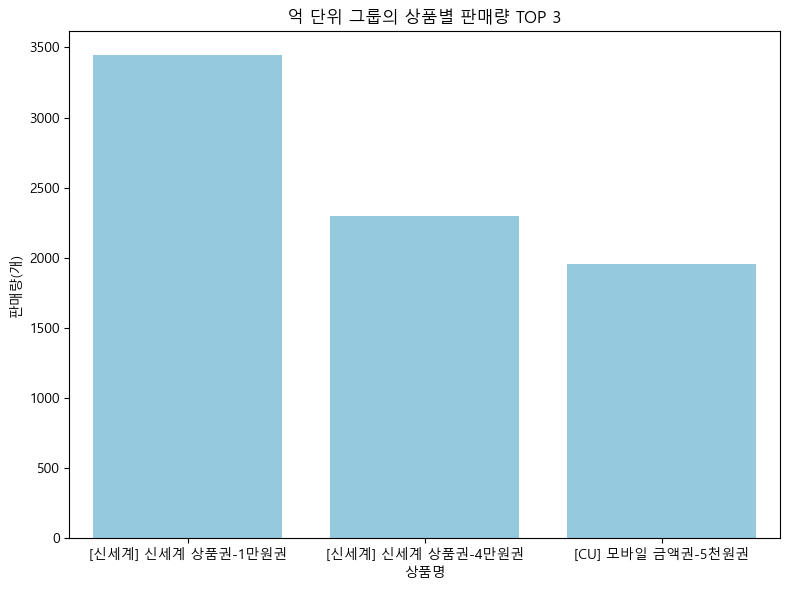

In [38]:
data = {
    '상품명': ['[신세계] 신세계 상품권-1만원권', '[신세계] 신세계 상품권-4만원권', '[CU] 모바일 금액권-5천원권'],
    '판매량': [3443, 2298, 1951]
}

# DataFrame 생성
billion_best = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(8, 6))

# 막대 그래프 생성
sns.barplot(data=billion_best, x='상품명', y='판매량', color = 'skyblue')

# 그래프 제목 및 축 라벨 설정
plt.title('억 단위 그룹의 상품별 판매량 TOP 3')
plt.xlabel('상품명')
plt.ylabel('판매량(개)')

# 그래프를 보여줌
plt.tight_layout()
plt.savefig('billion_best.png')
plt.show()

In [39]:
best_b = billion[billion['상품명'] == '[신세계] 신세계 상품권-1만원권']['주문일자'] #가장 많이 팔린 상품이 많이 팔린 날

In [40]:
best_b.value_counts().head(3)

주문일자
2022-10-07     25
2022-10-31     20
2022-09-15     20
Name: count, dtype: int64

In [41]:
million = p[p['monetary'] == '2'] # p에서 천만 단위 그룹만 추출
million['주문일자'] = million['주문일자'].apply(lambda x: str(x)[:11])

C:\Users\user\AppData\Local\Temp\ipykernel_13472\1942072813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  million['주문일자'] = million['주문일자'].apply(lambda x: str(x)[:11])


In [42]:
million

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency,frequency,monetary
79,191219105727621,조이스,[자바펜] 0.7mm 제도샤프-낱개,자바펜,9,7200,신용카드,2019-12-19,구매확정,N,NaN,NaN,1,2,2
80,191219105727621,조이스,[자바펜] 0.5mm 제도샤프-낱개,자바펜,8,6400,신용카드,2019-12-19,구매확정,N,NaN,NaN,1,2,2
81,191219105727621,조이스,[자바펜] 0.9mm 제도샤프-낱개,자바펜,9,7200,신용카드,2019-12-19,구매확정,N,NaN,NaN,1,2,2
82,191219105727621,조이스,[피스코리아] 스테플러(제본용) HD-130,피스코리아,1,24500,신용카드,2019-12-19,구매확정,N,NaN,NaN,1,2,2
145,191220161756613,조이스,[아이비스] 1000 PP 단어장/SP(색상랜덤),아이비스,50,35000,신용카드,2019-12-20,미결제,N,NaN,NaN,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218450,221107213255534,거영아이앤디,[학생선물] 500 해피프랜즈 랜덤 지우개-10개입,NaN,1,2650,신 + 포,2022-11-07,배송중,N,NaN,NaN,3,2,2
218462,221107215027277,거영아이앤디,[학생선물] 500 해피프랜즈 랜덤 지우개-10개입,NaN,1,2650,신 + 포,2022-11-07,배송중,N,NaN,NaN,3,2,2
218463,221107215027277,거영아이앤디,[학생선물] 8000 마이카 탈출 퍼즐게임,KY I&D,1,4600,신 + 포,2022-11-07,배송중,N,NaN,NaN,3,2,2
218494,221107225547411,거영아이앤디,[학생선물] 500 해피프랜즈 랜덤 지우개-10개입,NaN,1,2650,신 + 포,2022-11-07,배송중,N,NaN,NaN,3,2,2


In [43]:
million['상품명'].value_counts() # 천만 단위 상품 중 가장 많이 팔린 것과 개수

상품명
[학생선물] 2000 큐브 푸시 스피너                                428
[학생선물] 5000 게틀링 LED 멜로디 비눗방울 총 (랜덤발송)                255
[엠에프] 국산 3중필터 일회용 마스크 50매                            253
[디지털] 갤럭시탭 S6 라이트 하이브리드 스마트 케이스 (색상선택)               222
[학생선물] 4000 큐티 더블 정수기                                221
                                                    ... 
[스마트 HBE] 2학기 회원모집 업(UP) 종이 자석 스티커 10x15cm (옵션선택)      1
[학습준비물] 칼라팬시 햄버거 가게-색종이 접기                             1
[본쿠치나] 미니 믹서기 SC-2622BL(파스텔베이지)                        1
[ABKO] Beatonic 블루투스 이어폰 E40 블랙                        1
[자바펜] 0.7mm 제도샤프-낱개                                    1
Name: count, Length: 5027, dtype: int64

In [44]:
million['상품명'].value_counts().head(3) # 천만 단위 상품 중 가장 많이 상품 top3

상품명
[학생선물] 2000 큐브 푸시 스피너                    428
[학생선물] 5000 게틀링 LED 멜로디 비눗방울 총 (랜덤발송)    255
[엠에프] 국산 3중필터 일회용 마스크 50매                253
Name: count, dtype: int64

In [45]:
best_m = million[million['상품명'] == '[학생선물] 2000 큐브 푸시 스피너']['주문일자'] #가장 많이 팔린 상품이 많이 팔린 날

In [46]:
best_m.value_counts().head(3)

주문일자
2022-03-15     43
2022-03-17     42
2022-03-23     31
Name: count, dtype: int64

In [47]:
below = p[p['monetary'] == '1'] # p에서 그 이하 그룹만 추출
below['주문일자'] = below['주문일자'].apply(lambda x: str(x)[:11])

C:\Users\user\AppData\Local\Temp\ipykernel_13472\962684409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  below['주문일자'] = below['주문일자'].apply(lambda x: str(x)[:11])


In [48]:
below

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency,frequency,monetary
231,191223173733604,산스토어,[라인프렌즈] 공기청정기 (Pro),에어세이브,1,89800,신용카드,2019-12-23,미결제,N,NaN,NaN,1,1,1
232,191223173733604,산스토어,[코코젤리] 트리탑 세라믹 히터기 (KW-CH200/열풍기/PTC히터/온풍기),지노네트웍스,1,40000,신용카드,2019-12-23,미결제,N,NaN,NaN,1,1,1
391,191226173034386,산스토어,[라인프렌즈] 공기청정기 (Pro),에어세이브,1,89800,신용카드,2019-12-26,미결제,N,NaN,NaN,1,1,1
889,200107111249730,산스토어,[동원] 명절 식품 선물세트 + 동원 판호,NaN,1,0,NaN,2020-01-07,미결제,N,NaN,NaN,1,1,1
904,200107125349840,산스토어,[동원] 명절 식품 선물세트 + 동원 판호,NaN,1,0,신용카드,2020-01-07,미결제,N,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218274,221107163116324,오피스허브,[카카오프렌즈] 봉제 세안밴드-어피치,레전드코퍼레이션,10,30000,신 + 적,2022-11-07,배송준비,N,NaN,NaN,3,1,1
218356,221107190516783,그린피앤에스,[문구/사무] (only ) Green 칭찬쿠폰 만년 스탬프 10종,(주)그린피앤에스,1,6700,신 + 포,2022-11-07,미결제,N,NaN,NaN,3,1,1
218361,221107191615563,그린피앤에스,[문구/사무] 선생님 칭찬스탬프 1종 R-524 24x24mm,그린피앤에스,1,11000,신 + 포,2022-11-07,배송준비,N,NaN,NaN,3,1,1
218417,221107203233687,오피스허브,[론칭특가] 델리 마카롱 학생용 연필 12자루 HB 54900,델리,17,19380,포인트,2022-11-07,주문취소,N,NaN,NaN,3,1,1


In [49]:
below['상품명'].value_counts()  # 그 이하 상품 중 가장 많이 팔린 것과 개수

상품명
[보건용품] 투명쫄대가림판 - 마스크걸이용                       178
[문구/사무] (only ) Green 칭찬쿠폰 만년 스탬프 10종         145
[하루특가] 7321디자인-Plan B 스터디 플래너 ver.2 (옵션선택)     63
VSH-1000 스마트폰용 헤드폰                             55
[공동구매 특가] 스마트 해법 어린이 장우산-1Set 10개입             46
                                             ... 
[스낵포 EVENT]팬트리 무료- 다양한 구성의 지니마켓 간식박스 3탄         1
[학습교구] Catan 카탄                                 1
[학습교구] UbongoMini 우봉고미니                         1
[러닝리소스] 자석 분수 학습기 EDI4804                       1
[카카오프렌즈] 봉제 세안밴드-어피치                            1
Name: count, Length: 1146, dtype: int64

In [50]:
below['상품명'].value_counts().head(3) # 그 이하 상품 중 가장 많이 상품 top3

상품명
[보건용품] 투명쫄대가림판 - 마스크걸이용                       178
[문구/사무] (only ) Green 칭찬쿠폰 만년 스탬프 10종         145
[하루특가] 7321디자인-Plan B 스터디 플래너 ver.2 (옵션선택)     63
Name: count, dtype: int64

In [51]:
best_be =  below[below['상품명'] == '[보건용품] 투명쫄대가림판 - 마스크걸이용']['주문일자'] #가장 많이 팔린 상품이 많이 팔린 날

In [52]:
best_be.value_counts().head(3)

주문일자
2020-08-24     10
2020-09-17      6
2020-08-26      6
Name: count, dtype: int64

### 가장 비싼 상품의 금액대는 ? 

In [53]:
billion['판매금액'].max()

19800000

In [54]:
billion[billion['판매금액'] == 19800000]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency,frequency,monetary
99985,211123163230446,천재태블릿,[스마트 HBE] 학습 전용 태블릿-정기결제,삼성전자,50,19800000,정기결제,2021-11-23,구매확정,N,NaN,24개월,2,2,3


In [55]:
	19800000 / 50

396000.0

In [56]:
million['판매금액'].max()

3520800

In [57]:
million[million['판매금액'] == 3520800]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency,frequency,monetary
125062,220221152659302,비즈마켓렌탈,[렌탈] 코웨이 노블 대용량 공기청정기 (등록비/배송비/설치비 무료),NaN,1,3520800,-,2022-02-21,상담취소,N,NaN,NaN,3,1,2


In [58]:
below['판매금액'].max()

3200000

In [59]:
below[below['판매금액'] == 3200000]

,주문번호,업체명,상품명,제조사,주문수량,판매금액,결제방법,주문일자,처리상태,초도상품,제작문구 내역,할부기간,recency,frequency,monetary
130824,220315161716880,테스트,테스트-후불미결제,NaN,8,3200000,-,2022-03-15,상담취소,N,NaN,NaN,3,1,1


### 각 그룹에서 많이 팔린 날은 ?

In [60]:
billion['주문일자'].value_counts()

주문일자
2022-02-04     3188
2020-08-12     1535
2022-10-21      829
2020-08-13      813
2020-12-31      796
               ... 
2020-04-12        2
2020-10-02        1
2020-10-01        1
2019-12-17        1
2019-12-13        1
Name: count, Length: 1058, dtype: int64

In [61]:
million['주문일자'].value_counts()

주문일자
2020-04-24     179
2022-07-13     168
2020-06-12     163
2022-03-15     161
2020-02-14     145
              ... 
2020-08-22       1
2020-07-12       1
2020-07-05       1
2020-06-20       1
2022-11-08       1
Name: count, Length: 1012, dtype: int64

In [62]:
below['주문일자'].value_counts()

주문일자
2020-12-29     120
2022-11-01      80
2022-10-25      75
2022-11-02      57
2020-12-22      55
              ... 
2021-07-04       1
2020-05-08       1
2021-07-03       1
2020-05-05       1
2021-11-02       1
Name: count, Length: 689, dtype: int64